"Grupo 2"

- Aaban Vasconcelos Zyzzyag (avz@cesar.school)
- Celina Gondim (acgs2@cesar.school)
- Mirella Farias (mcf4@cesar.school)

# Configuração do Ambiente

In [ ]:
# Importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.cm as cm #colormap

# Carregar e Preparar os Dados

In [ ]:
# Carregar o dataset
# path = kagglehub.dataset_download("adilshamim8/education-and-career-success")
# df = pd.read_csv(f'{path}/education_career_success.csv')
url = 'https://raw.githubusercontent.com/avzcesar/atividadefinal/refs/heads/main/education_career_success.csv'
df = pd.read_csv(url)

# Exibir informações gerais do dataframe
df.info()

# Exibir estatísticas descritivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000


# Análise Exploratória dos Dados

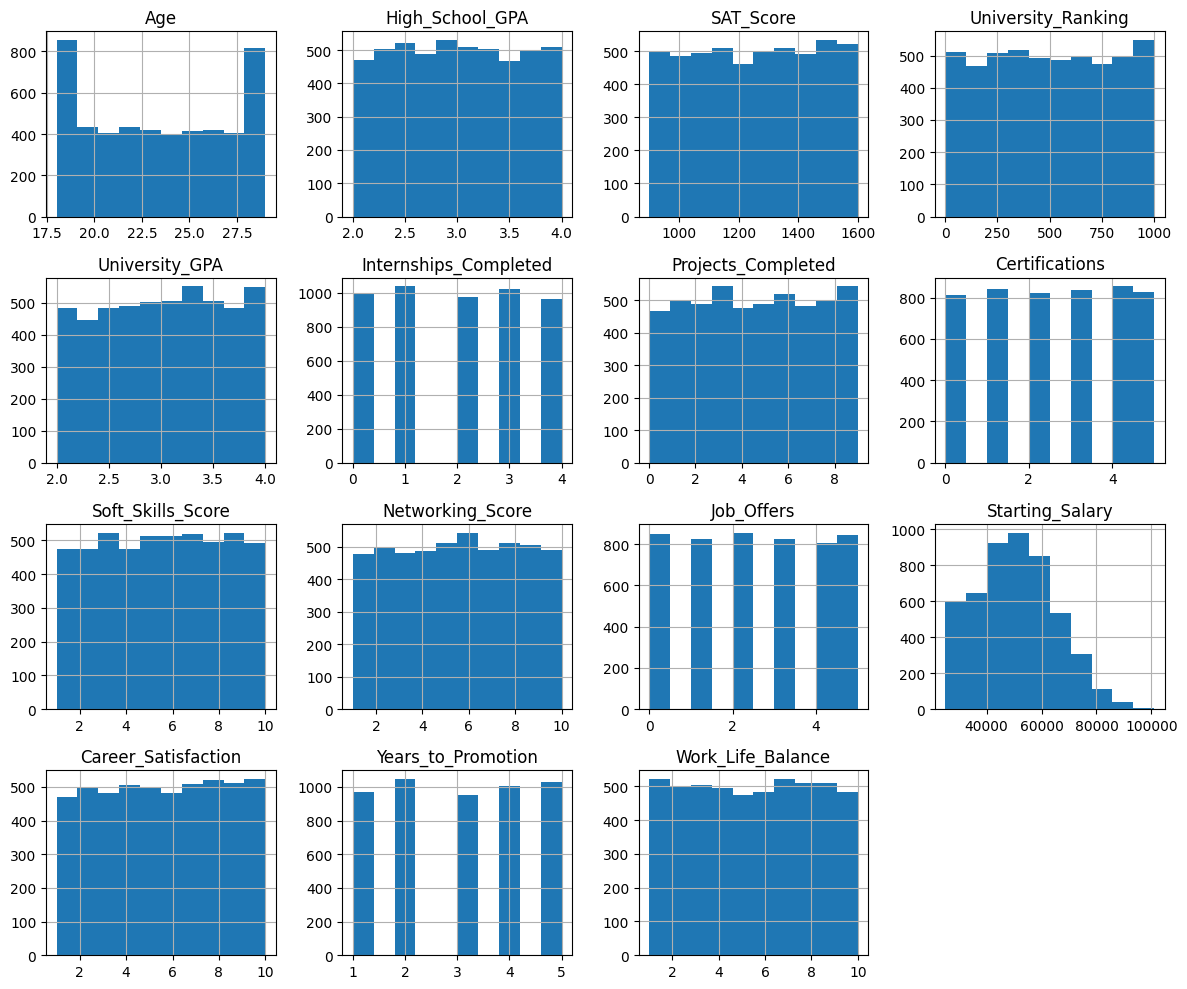

In [ ]:
# Visualizar distribuições das variáveis numéricas
colums = df.columns
df[colums].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

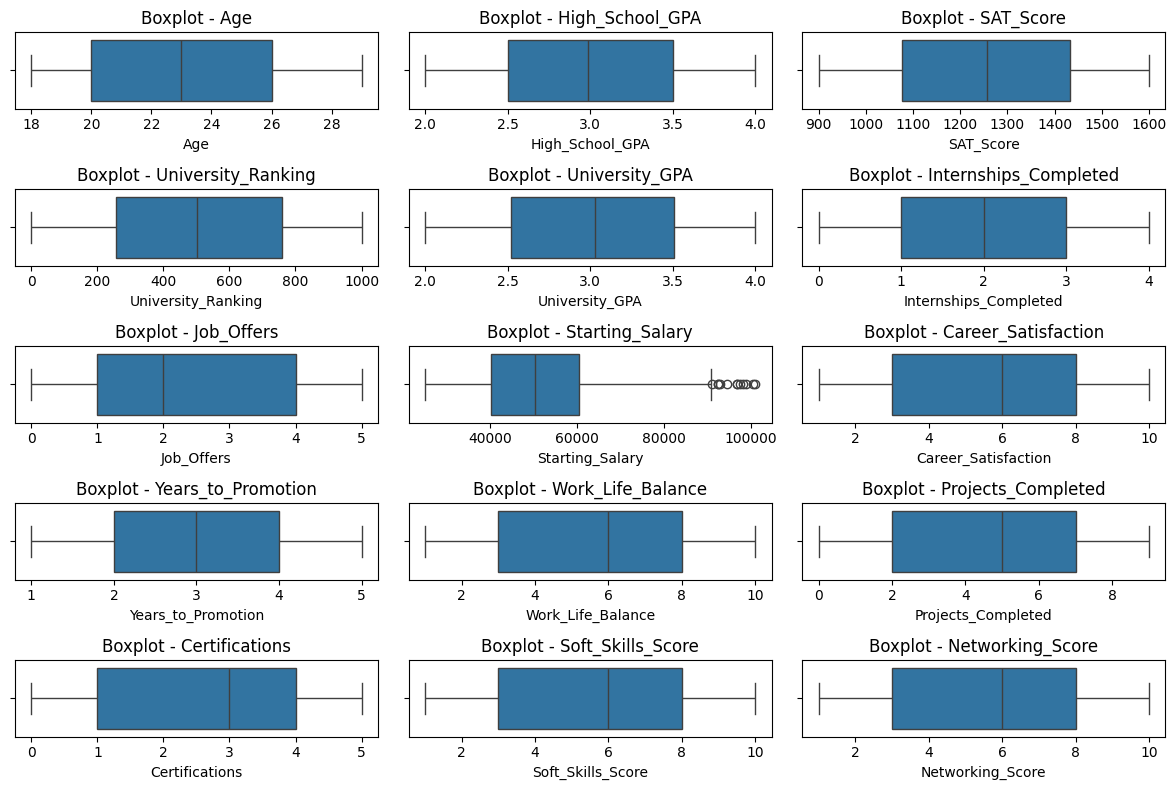

In [ ]:
# Boxplots para identificar outliers
numerical_cols = ['Age',
                  'High_School_GPA',
                  'SAT_Score',
                  'University_Ranking',
                  'University_GPA',
                  'Internships_Completed',
                  'Job_Offers',
                  'Starting_Salary',
                  'Career_Satisfaction',
                  'Years_to_Promotion',
                  'Work_Life_Balance',
                  'Projects_Completed',
                  'Certifications',
                  'Soft_Skills_Score',
                  'Networking_Score',
                  ]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

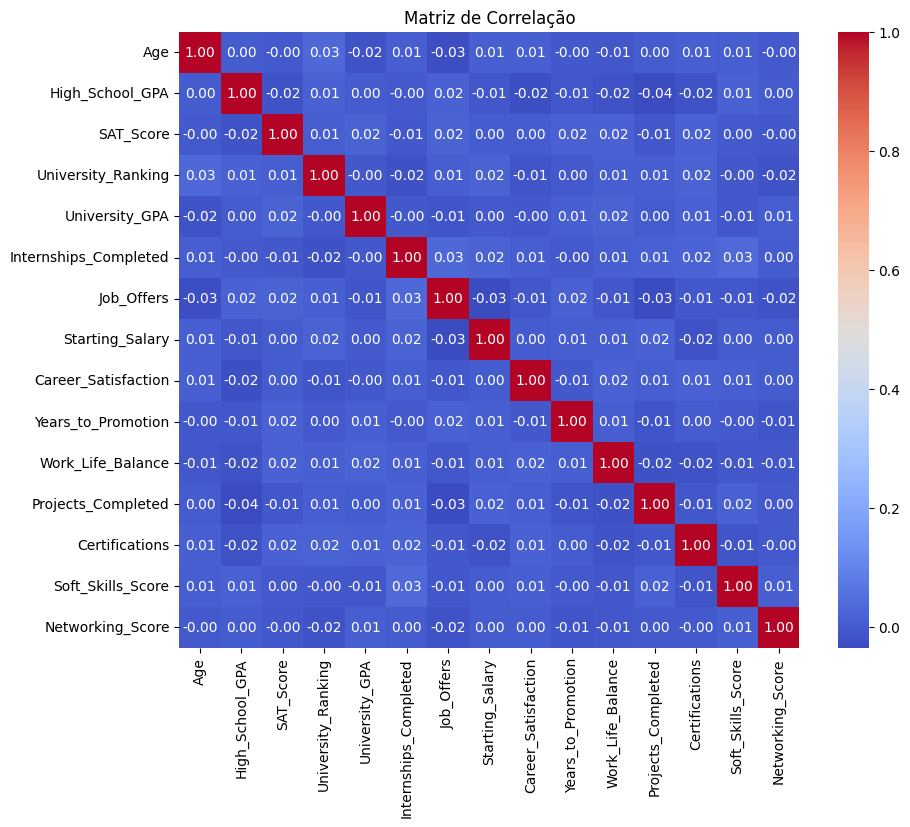

In [ ]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,2458
Female,2350
Other,192


In [ ]:
df['Field_of_Study'].value_counts()

,count
Field_of_Study,
Arts,749
Mathematics,745
Law,727
Business,719
Engineering,701
Medicine,689
Computer Science,670


In [ ]:
df['Current_Job_Level'].value_counts()

,count
Current_Job_Level,
Entry,2463
Mid,1544
Senior,770
Executive,223


In [ ]:
df['Entrepreneurship'].value_counts()

,count
Entrepreneurship,
No,3992
Yes,1008


# Pré-processamento dos Dados

### Reduzir o universo a ser analisado

In [ ]:
df_copy = df.copy()

In [ ]:
# Determinando a coluna Student ID como índice
df_copy.set_index('Student_ID', inplace=True)
df_copy.head()

,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
Student_ID,,,,,,,,,,,,,,,,,,,
S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [ ]:
# Remover nível profissional diferente de Entry para analisarmos apenas as pessoas que estão entrando no mercado de trabalho
df_copy.drop(df_copy[df_copy['Current_Job_Level'] != 'Entry'].index, inplace=True)

In [ ]:
# Como estamos trabalhando só com entrantes no mercado de trabalho, podemos remover essa coluna
df_copy.drop('Current_Job_Level', axis=1, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2463 entries, S00001 to S04999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2463 non-null   int64  
 1   Gender                 2463 non-null   object 
 2   High_School_GPA        2463 non-null   float64
 3   SAT_Score              2463 non-null   int64  
 4   University_Ranking     2463 non-null   int64  
 5   University_GPA         2463 non-null   float64
 6   Field_of_Study         2463 non-null   object 
 7   Internships_Completed  2463 non-null   int64  
 8   Projects_Completed     2463 non-null   int64  
 9   Certifications         2463 non-null   int64  
 10  Soft_Skills_Score      2463 non-null   int64  
 11  Networking_Score       2463 non-null   int64  
 12  Job_Offers             2463 non-null   int64  
 13  Starting_Salary        2463 non-null   float64
 14  Career_Satisfaction    2463 non-null   int64  
 15  Ye

### Criar novas variáveis numéricas

In [ ]:
# Criar variável ROI_Education
df_copy['ROI_Education'] = df_copy['Starting_Salary'] / (df_copy['University_GPA'] + df_copy['University_Ranking']/1000 + 1)

In [ ]:
# Criar variável Success_Index
df_copy['Success_Index'] = df_copy['Job_Offers'] * 0.3 +df_copy['Starting_Salary'] * 0.4 + df_copy['Career_Satisfaction'] * 0.2 + df_copy['Years_to_Promotion'] * 0.1

In [ ]:
# Criar variável Balance_Index
df_copy['Balance_Index'] = df_copy['Work_Life_Balance'] * 0.5 + df_copy['Soft_Skills_Score'] * 0.3 + df_copy['Networking_Score'] * 0.2

### Converter variáveis categóricas em numéricas

In [ ]:
# Substituir valores categóricos por numéricos
obj_cols = ['Gender',
           'Entrepreneurship',
            'Field_of_Study'
            ]

for col in obj_cols:
    df_copy[col] = df_copy[col].astype('category').cat.codes

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2463 entries, S00001 to S04999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2463 non-null   int64  
 1   Gender                 2463 non-null   int8   
 2   High_School_GPA        2463 non-null   float64
 3   SAT_Score              2463 non-null   int64  
 4   University_Ranking     2463 non-null   int64  
 5   University_GPA         2463 non-null   float64
 6   Field_of_Study         2463 non-null   int8   
 7   Internships_Completed  2463 non-null   int64  
 8   Projects_Completed     2463 non-null   int64  
 9   Certifications         2463 non-null   int64  
 10  Soft_Skills_Score      2463 non-null   int64  
 11  Networking_Score       2463 non-null   int64  
 12  Job_Offers             2463 non-null   int64  
 13  Starting_Salary        2463 non-null   float64
 14  Career_Satisfaction    2463 non-null   int64  
 15  Ye

# Definição das Features

#### Análise de Dimensionalidade (DBA) com PCA - MODELO NÃO SUPERVISIONADO

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

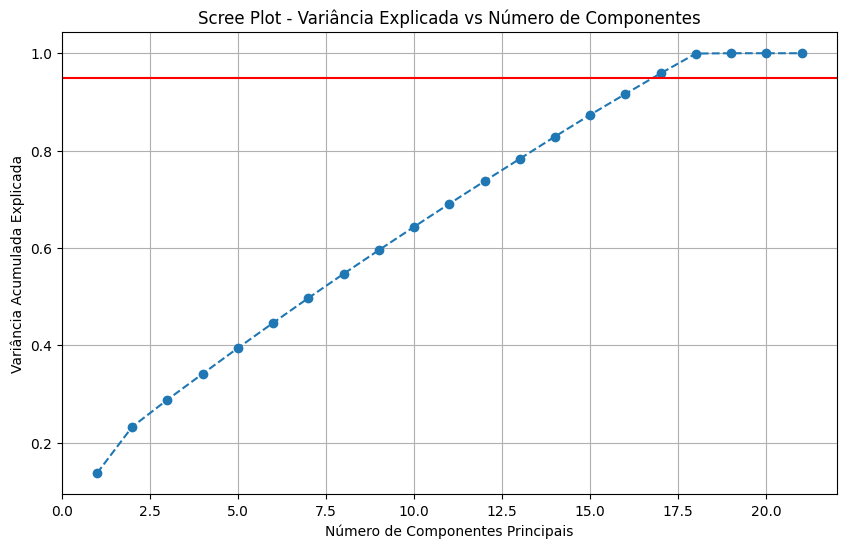

Número ótimo de componentes principais: 17
Features selecionadas: ['Networking_Score', 'Career_Satisfaction', 'Entrepreneurship', 'SAT_Score', 'Projects_Completed', 'High_School_GPA', 'Gender', 'Soft_Skills_Score', 'Job_Offers', 'University_Ranking', 'Age', 'Years_to_Promotion', 'Certifications', 'Field_of_Study', 'University_GPA', 'Internships_Completed', 'Work_Life_Balance']


In [ ]:
X = df_copy.copy()

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando PCA com todos os componentes possíveis
pca = PCA()
pca.fit(X_scaled)

# Calculando variância acumulada explicada
cum_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotando o gráfico da variância explicada (Scree Plot)
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cum_variance)+1), cum_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.title('Scree Plot - Variância Explicada vs Número de Componentes')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='-')  # linha de referência para 95% da variância
plt.show()

# Definir o número ideal de componentes (ex: variância acumulada de 95%)
n_components = np.argmax(cum_variance >= 0.95) + 1
print('Número ótimo de componentes principais:', n_components)

# Determinar as features mais importantes com base nas cargas das componentes
loading_scores = np.abs(pca.components_[:n_components]).sum(axis=0)
feature_importance = pd.Series(loading_scores, index=X.columns)
selected_features = feature_importance.sort_values(ascending=False).index.tolist()

# Exibir a lista de features selecionadas
print('Features selecionadas:', selected_features[:n_components])


In [ ]:
# Lista com colunas que você quer manter
colunas_para_manter_PCA = ['Career_Satisfaction', 'Networking_Score', 'University_GPA', 'High_School_GPA', 'University_Ranking', 'Soft_Skills_Score', 'Entrepreneurship', 'Age', 'SAT_Score', 'Years_to_Promotion', 'Job_Offers', 'Gender', 'Projects_Completed', 'Field_of_Study', 'Certifications', 'Internships_Completed', 'Work_Life_Balance']

# Dropando todas as colunas que não estão na lista
df_PCA = X[colunas_para_manter_PCA]

# Exibindo resultado
df_PCA.head()

,Career_Satisfaction,Networking_Score,University_GPA,High_School_GPA,University_Ranking,Soft_Skills_Score,Entrepreneurship,Age,SAT_Score,Years_to_Promotion,Job_Offers,Gender,Projects_Completed,Field_of_Study,Certifications,Internships_Completed,Work_Life_Balance
Student_ID,,,,,,,,,,,,,,,,,
S00001,4,8,3.96,3.58,291,9,0,24,1052,5,5,1,7,0,2,3,7
S00003,9,9,2.63,3.42,715,1,0,28,1193,3,0,0,8,6,1,4,7
S00005,9,9,2.48,2.08,599,10,0,22,1012,5,4,1,6,3,4,4,2
S00006,9,2,3.78,2.40,631,2,1,24,1600,2,1,1,3,4,2,2,8
S00008,2,1,2.84,2.68,240,5,0,20,1074,3,2,1,5,2,5,1,3


#### Análise de Dimensionalidade (DBA) com ANOVA F-test - MODELO SUPERVISIONADO


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Separando as features (X) e o target (y)
aux = df_copy.copy()
X = aux.drop(columns=['Success_Index'])
y = aux['Success_Index']

# Aplicando SelectKBest com ANOVA F-test para selecionar as melhores variáveis
k_best = SelectKBest(score_func=f_classif, k=10)
X_kbest = k_best.fit_transform(X, y)

# Resultado das variáveis selecionadas
selected_features = X.columns[k_best.get_support(indices=True)]

print('Features selecionadas:\n', selected_features)

Features selecionadas:
 Index(['Age', 'High_School_GPA', 'Projects_Completed', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Entrepreneurship', 'ROI_Education', 'Balance_Index'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
# Lista com colunas que você quer manter
colunas_para_manter_ANOVA = ['Age', 'High_School_GPA', 'Projects_Completed', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Entrepreneurship', 'ROI_Education', 'Balance_Index']

# Dropando todas as colunas que não estão na lista
df_ANOVA = X[colunas_para_manter_ANOVA]

# Exibindo resultado
df_ANOVA.head()

,Age,High_School_GPA,Projects_Completed,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Entrepreneurship,ROI_Education,Balance_Index
Student_ID,,,,,,,,,,
S00001,24,3.58,7,5,27200.0,4,5,0,5179.965721,7.8
S00003,28,3.42,8,0,42400.0,9,3,0,9758.342923,5.6
S00005,22,2.08,6,4,47600.0,9,5,0,11669.526845,5.8
S00006,24,2.40,3,1,68400.0,9,2,1,12640.916651,5.0
S00008,20,2.68,5,2,38000.0,2,3,0,9313.725490,3.2


# Análise dos modelos de clusterização

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

### Modelo K-Means com dimensionalidades reduzidas via PCA

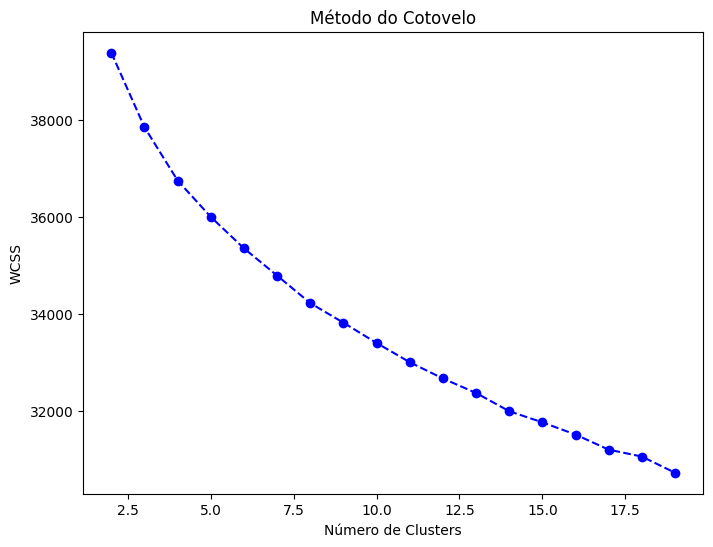

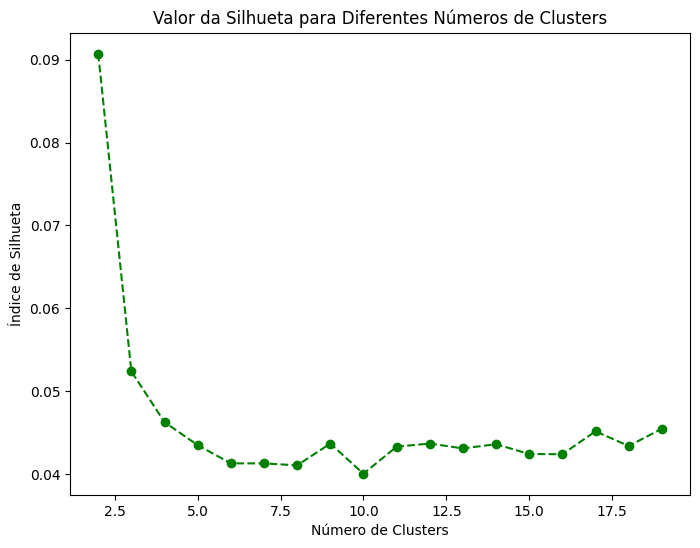

Número ótimo de clusters com base na silhueta: 2
Melhor pontuação de silhueta: 0.09071508502710413
Distribuição dos Clusters:
Cluster_KMeans_PCA
0     481
1    1982
Name: count, dtype: int64


In [ ]:
# Inicializar listas para armazenar métricas
wcss = []
silhouettes = []
inertia = []

# Normalizar as variáveis
scaler = StandardScaler()
df_PCA_scaled = pd.DataFrame(scaler.fit_transform(df_PCA), columns=df_PCA.columns, index=df_PCA.index)
df_PCA_scaled = pd.DataFrame(df_PCA_scaled)

# Testar diferentes números de clusters (de 2 a 19)
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_PCA_scaled)
    wcss.append(kmeans.inertia_)

    # Obter rótulos dos clusters
    labels = kmeans.predict(df_PCA_scaled)

    # Calcular a média da silhueta
    silh = silhouette_score(df_PCA_scaled, labels)
    silhouettes.append(silh)
    inertia.append(kmeans.inertia_)

# Encontrar o melhor número de clusters baseado na silhueta
optimal_k = np.argmax(silhouettes) + 2  # Adicionamos 2 pois o range começa em 2

# Aplicar K-Means com o número ótimo de clusters
tuned_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels_tuned = tuned_kmeans.fit_predict(df_PCA_scaled)

# Plotar o Método do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), wcss, marker='o', linestyle='--', color='b')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Calcular o coeficiente de silhueta para cada ponto
sample_silhouette_values = silhouette_samples(df_PCA_scaled, labels_tuned)

# Plotar os valores de silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), silhouettes, marker='o', linestyle='--', color='g')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta')
plt.title('Valor da Silhueta para Diferentes Números de Clusters')
plt.show()

print(f"Número ótimo de clusters com base na silhueta: {optimal_k}")
print(f"Melhor pontuação de silhueta: {max(silhouettes)}")


# Adicionar os clusters ao dataframe
df_copy['Cluster_KMeans_PCA'] = labels_tuned

# Contar o número de elementos em cada cluster
cluster_counts = df_copy['Cluster_KMeans_PCA'].value_counts().sort_index()

# Exibir os resultados
print("Distribuição dos Clusters:")
print(cluster_counts)


### Modelo DBSCAN com dimensionalidades reduzidas via ANOVA F-test

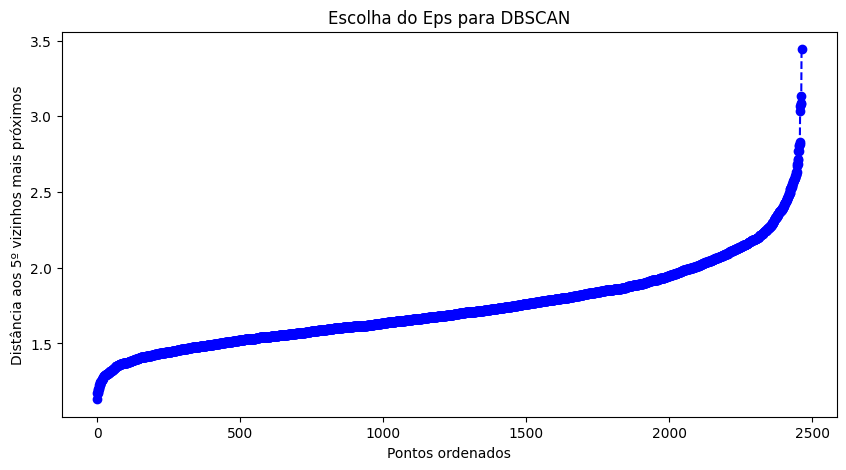

Eps Otimizado: 2.2461192325371178
Silhueta DBSCAN: 0.1375499728821017


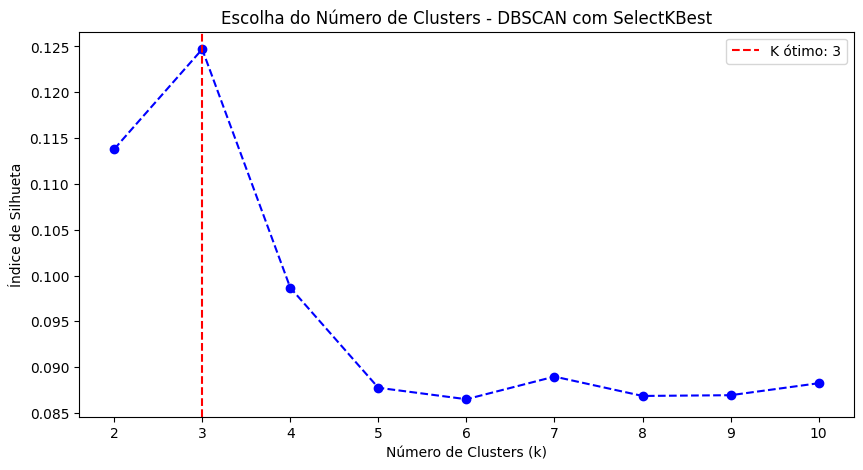

Distribuição dos Clusters - DBSCAN:
 0    1975
 1     464
-1      24
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Ajuste os parâmetros eps (distância máxima entre pontos vizinhos)

# Normalizar as variáveis
scaler = StandardScaler()
df_ANOVA_scaled = pd.DataFrame(scaler.fit_transform(df_ANOVA), columns=df_ANOVA.columns, index=df_ANOVA.index)
df_ANOVA_scaled = pd.DataFrame(df_ANOVA_scaled)

# Encontrar um valor adequado para eps baseado na distância média dos k vizinhos mais próximos
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(df_ANOVA_scaled)
distances, _ = nearest_neighbors.kneighbors(df_ANOVA_scaled)
distances = np.sort(distances[:, -1])

# Plotar gráfico para definir o melhor eps
plt.figure(figsize=(10, 5))
plt.plot(distances, marker='o', linestyle='--', color='b')
plt.xlabel('Pontos ordenados')
plt.ylabel('Distância aos 5º vizinhos mais próximos')
plt.title('Escolha do Eps para DBSCAN')
plt.show()

# Estimar um valor adequado para eps baseado no ponto de inflexão da curva
eps_optimal = distances[int(len(distances) * 0.95)]

# Aplicar DBSCAN com o eps otimizado
dbscan = DBSCAN(eps=eps_optimal, min_samples=5)
labels_dbscan = dbscan.fit_predict(df_ANOVA_scaled)

# Verificar se há mais de um cluster válido
if len(set(labels_dbscan)) > 1:
    silhouette_avg_dbscan = silhouette_score(df_ANOVA_scaled, labels_dbscan)
else:
    silhouette_avg_dbscan = "Silhueta não pode ser calculada (apenas um cluster identificado)"

# Exibir o eps ajustado e a pontuação da silhueta
print(f"Eps Otimizado: {eps_optimal}")
print(f"Silhueta DBSCAN: {silhouette_avg_dbscan}")

# Plotar a análise da silhueta para DBSCAN
plt.figure(figsize=(10, 5))
k_range = range(2, 11)
silhouette_scores_dbscan = []
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_test = kmeans_test.fit_predict(df_ANOVA_scaled)
    silhouette_scores_dbscan.append(silhouette_score(df_ANOVA_scaled, labels_test))

optimal_k = k_range[np.argmax(silhouette_scores_dbscan)]
plt.plot(k_range, silhouette_scores_dbscan, marker='o', linestyle='--', color='b')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'K ótimo: {optimal_k}')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silhueta')
plt.title('Escolha do Número de Clusters - DBSCAN com SelectKBest')
plt.legend()
plt.show()

# Adicionar os clusters ao dataframe
df_copy['Cluster_DBSCAN_ANOVA'] = labels_dbscan

# Exibir a contagem dos clusters
cluster_counts_dbscan = pd.Series(labels_dbscan).value_counts()
print("Distribuição dos Clusters - DBSCAN:")
print(cluster_counts_dbscan)

### Modelo K-Means com dimensionalidades reduzidas via ANOVA F-test

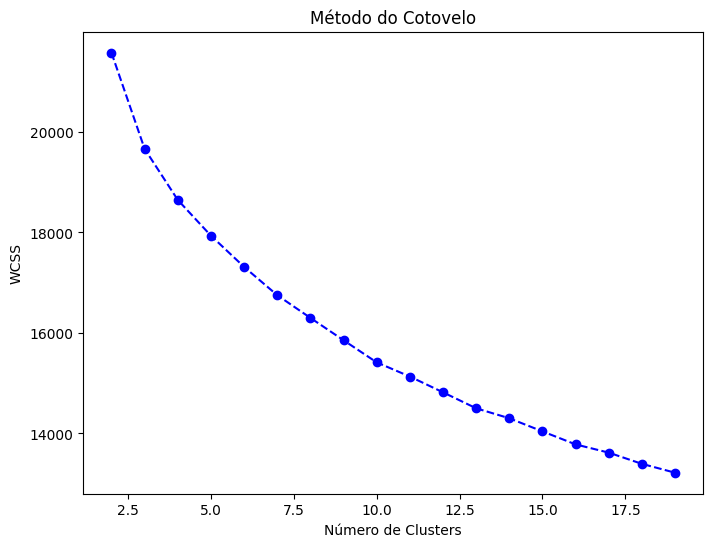

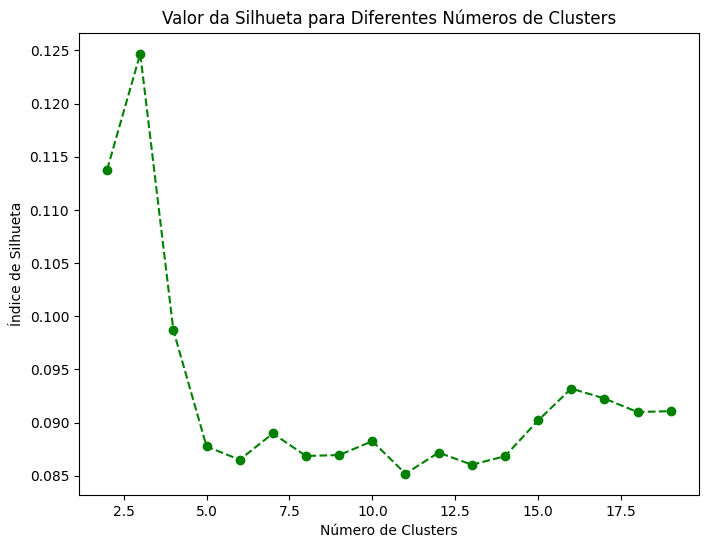

Número ótimo de clusters com base na silhueta: 3
Melhor pontuação de silhueta: 0.1246909689962529
Distribuição dos Clusters:
Cluster_KMeans_ANOVA
0    1069
1     926
2     468
Name: count, dtype: int64


In [ ]:
# Inicializar listas para armazenar métricas
wcss = []
silhouettes = []
inertia = []

# Testar diferentes números de clusters (de 2 a 19)
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_ANOVA_scaled)
    wcss.append(kmeans.inertia_)

    # Obter rótulos dos clusters
    labels = kmeans.predict(df_ANOVA_scaled)

    # Calcular a média da silhueta
    silh = silhouette_score(df_ANOVA_scaled, labels)
    silhouettes.append(silh)
    inertia.append(kmeans.inertia_)

# Plotar o Método do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), wcss, marker='o', linestyle='--', color='b')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Encontrar o melhor número de clusters baseado na silhueta
optimal_k = np.argmax(silhouettes) + 2  # Adicionamos 2 pois o range começa em 2

# Aplicar K-Means com o número ótimo de clusters
tuned_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels_tuned = tuned_kmeans.fit_predict(df_ANOVA_scaled)

# Calcular o coeficiente de silhueta para cada ponto
sample_silhouette_values = silhouette_samples(df_ANOVA_scaled, labels_tuned)

# Plotar os valores de silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), silhouettes, marker='o', linestyle='--', color='g')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta')
plt.title('Valor da Silhueta para Diferentes Números de Clusters')
plt.show()

print(f"Número ótimo de clusters com base na silhueta: {optimal_k}")
print(f"Melhor pontuação de silhueta: {max(silhouettes)}")

# Adicionar os clusters ao dataframe
df_copy['Cluster_KMeans_ANOVA'] = labels_tuned

# Contar o número de elementos em cada cluster
cluster_counts = df_copy['Cluster_KMeans_ANOVA'].value_counts().sort_index()

# Exibir os resultados
print("Distribuição dos Clusters:")
print(cluster_counts)

# Aplicação do modelo escolhido



> *Escolhido o Modelo K-Means com dimensionalidades reduzidas via ANOVA F-test por apresentar melhor coeficiente de silhueta que o Modelo K-Means com dimensionalidades reduzidas via PCA e também por apresentar clusters volumetricamente mais balanceados que os criados pelo Modelo DBSCAN com dimensionalidades reduzidas via ANOVA F-test.*



In [ ]:
# Remover a aplicação da clusterização dos métodos descartados
df_copy.drop(columns=['Cluster_DBSCAN_ANOVA', 'Cluster_KMeans_PCA'], inplace=True, errors='ignore')

### Analise de sobreposição para reduzir mais a dimensionalidade

In [ ]:
# Calcular a média de cada variável dentro de cada cluster
cluster_means = df_copy.groupby('Cluster_KMeans_ANOVA').mean()

# Calcular o desvio padrão dentro de cada cluster
cluster_std = df_copy.groupby('Cluster_KMeans_ANOVA').std()

# Calcular a sobreposição: relação entre a variabilidade intra-cluster e a amplitude das médias
overlap_scores = cluster_std.mean() / (cluster_means.max() - cluster_means.min())

# Ordenar as variáveis com maior sobreposição
overlapping_variables = overlap_scores.sort_values(ascending=False)

# Exibir as variáveis mais sobrepostas
print("Variáveis com Maior Sobreposição:")
print(overlapping_variables)

Variáveis com Maior Sobreposição:
Internships_Completed    47.706452
Gender                   33.698998
Work_Life_Balance        28.950640
Balance_Index            23.707105
SAT_Score                20.992435
Projects_Completed       16.311912
Soft_Skills_Score        15.956614
Networking_Score         15.794094
Field_of_Study           14.950971
Career_Satisfaction      12.604304
High_School_GPA          12.317776
Certifications           10.001816
University_Ranking        9.079331
Age                       6.951220
Job_Offers                6.888325
Years_to_Promotion        5.893608
University_GPA            3.139891
ROI_Education             0.463948
Success_Index             0.447064
Starting_Salary           0.447062
Entrepreneurship          0.039238
dtype: float64


In [ ]:
# Remover colunas menos relevantes e com muita sobreposição
df_final = df_copy.copy()
df_final.drop(columns=['Internships_Completed', 'SAT_Score', 'Soft_Skills_Score', 'Certifications', 'Networking_Score',  'Gender', 'Work_Life_Balance', 'Projects_Completed', 'University_Ranking', 'Field_of_Study', 'Years_to_Promotion', 'Balance_Index', 'Career_Satisfaction', 'University_GPA', 'High_School_GPA', 'Age', 'Job_Offers', 'Entrepreneurship', 'Cluster_KMeans_ANOVA' ], inplace=True, errors='ignore')

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2463 entries, S00001 to S04999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Starting_Salary  2463 non-null   float64
 1   ROI_Education    2463 non-null   float64
 2   Success_Index    2463 non-null   float64
dtypes: float64(3)
memory usage: 141.5+ KB


### Análise de outliers para reduzir o ruído

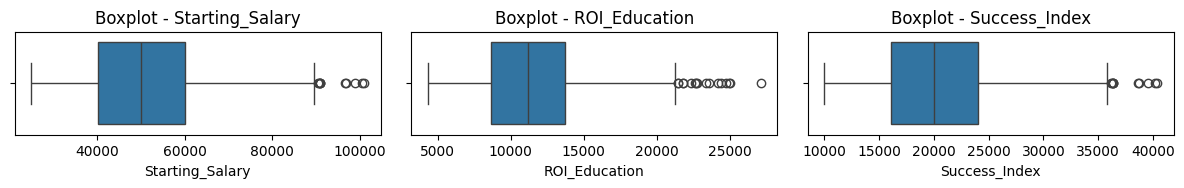

In [ ]:
# Boxplots para identificar outliers
numerical_cols = ['Starting_Salary',
                  'ROI_Education',
                  'Success_Index',
                  ]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df_final[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(df, columns, threshold=1.5):
    df_clean = df_final.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filtrar os dados para remover outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Definir as colunas onde queremos remover outliers
numeric_columns = ['Starting_Salary',
                  'ROI_Education',
                  'Success_Index',
                  ]


# Aplicar a função para remover outliers
df_cleaned = remove_outliers_iqr(df, numeric_columns)

# Exibir tamanho antes e depois
print(f"Tamanho original: {df.shape[0]} linhas")
print(f"Tamanho após remoção de outliers: {df_cleaned.shape[0]} linhas")

Tamanho original: 5000 linhas
Tamanho após remoção de outliers: 2437 linhas


In [ ]:
df_cleaned

,Starting_Salary,ROI_Education,Success_Index
Student_ID,,,
S00001,27200.0,5179.965721,10882.8
S00003,42400.0,9758.342923,16962.1
S00005,47600.0,11669.526845,19043.5
S00006,68400.0,12640.916651,27362.3
S00008,38000.0,9313.725490,15201.3
...,...,...,...
S04991,25000.0,6337.135615,10001.1
S04992,65100.0,17561.370380,26042.6
S04994,49700.0,8906.810036,19881.7


### Modelo K-Means com dimensionalidades reduzidas via ANOVA F-test

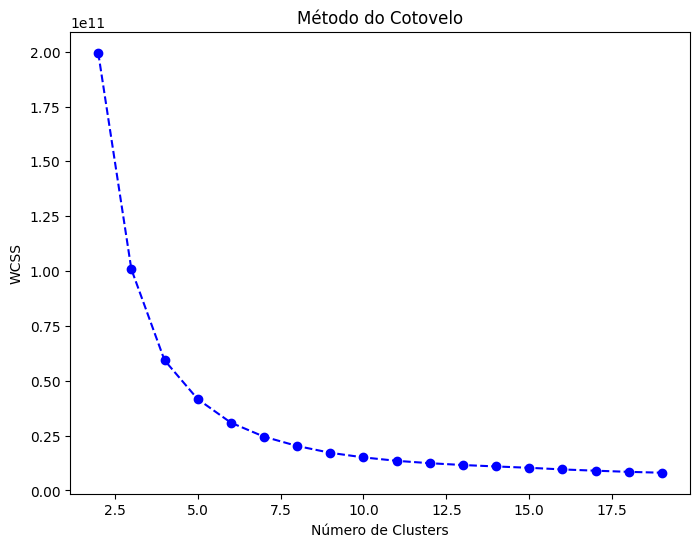

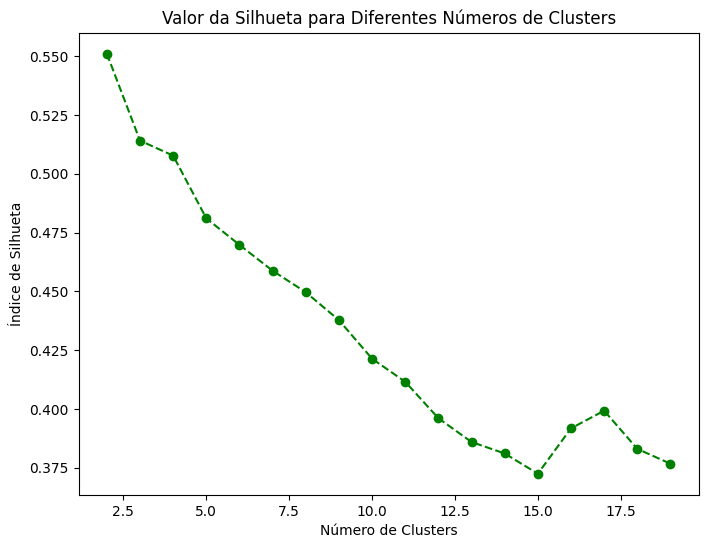

Número ótimo de clusters com base na silhueta: 2
Melhor pontuação de silhueta: 0.5510223774577314


In [ ]:
# Inicializar listas para armazenar métricas
wcss = []
silhouettes = []
inertia = []

# Normalizar as variáveis
scaler = StandardScaler()
base = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns, index=df_cleaned.index)
base = pd.DataFrame(df_cleaned)


# Testar diferentes números de clusters (de 2 a 19)
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(base)
    wcss.append(kmeans.inertia_)

    # Obter rótulos dos clusters
    labels = kmeans.predict(base)

    # Calcular a média da silhueta
    silh = silhouette_score(base, labels)
    silhouettes.append(silh)
    inertia.append(kmeans.inertia_)

# Plotar o Método do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), wcss, marker='o', linestyle='--', color='b')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Encontrar o melhor número de clusters baseado na silhueta
optimal_k = np.argmax(silhouettes) + 2  # Adicionamos 2 pois o range começa em 2

# Aplicar K-Means com o número ótimo de clusters
tuned_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels_tuned = tuned_kmeans.fit_predict(df_cleaned)

# Calcular o coeficiente de silhueta para cada ponto
sample_silhouette_values = silhouette_samples(df_cleaned, labels_tuned)

# Plotar os valores de silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), silhouettes, marker='o', linestyle='--', color='g')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta')
plt.title('Valor da Silhueta para Diferentes Números de Clusters')
plt.show()

print(f"Número ótimo de clusters com base na silhueta: {optimal_k}")
print(f"Melhor pontuação de silhueta: {max(silhouettes)}")

# Determinação do Número Ótimo de Clusters

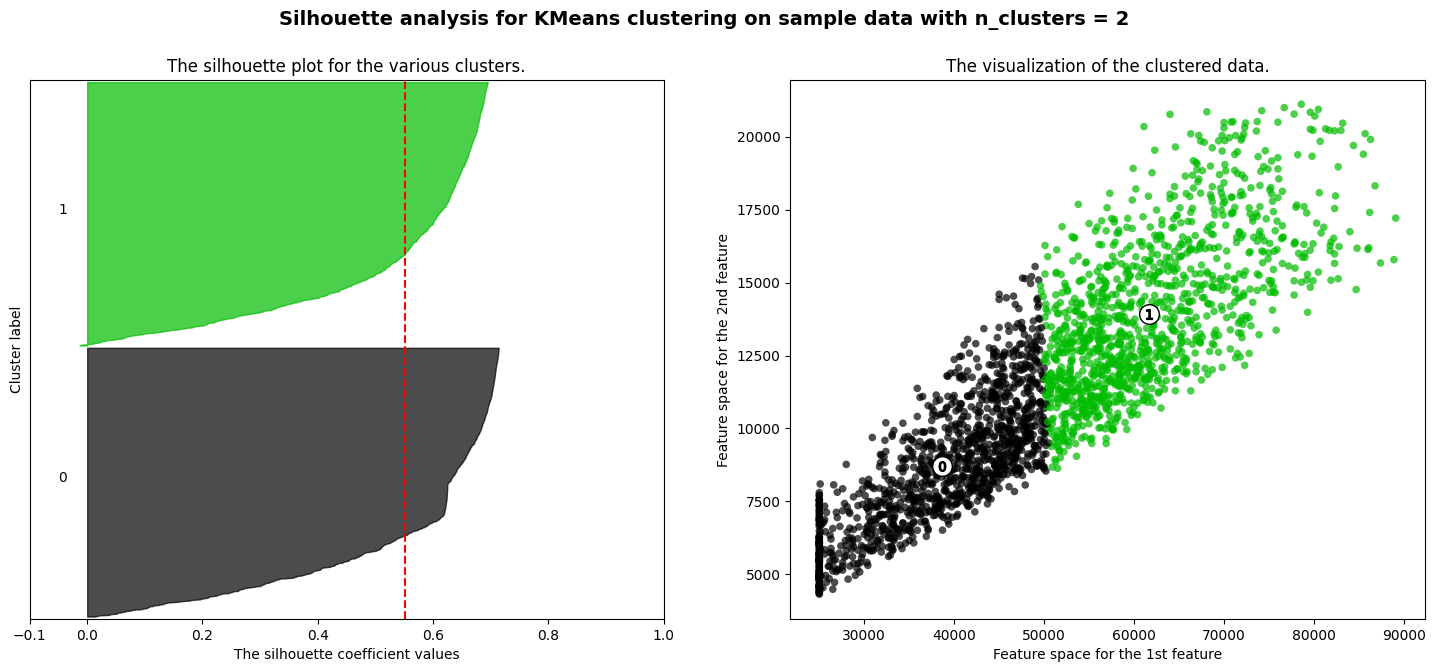

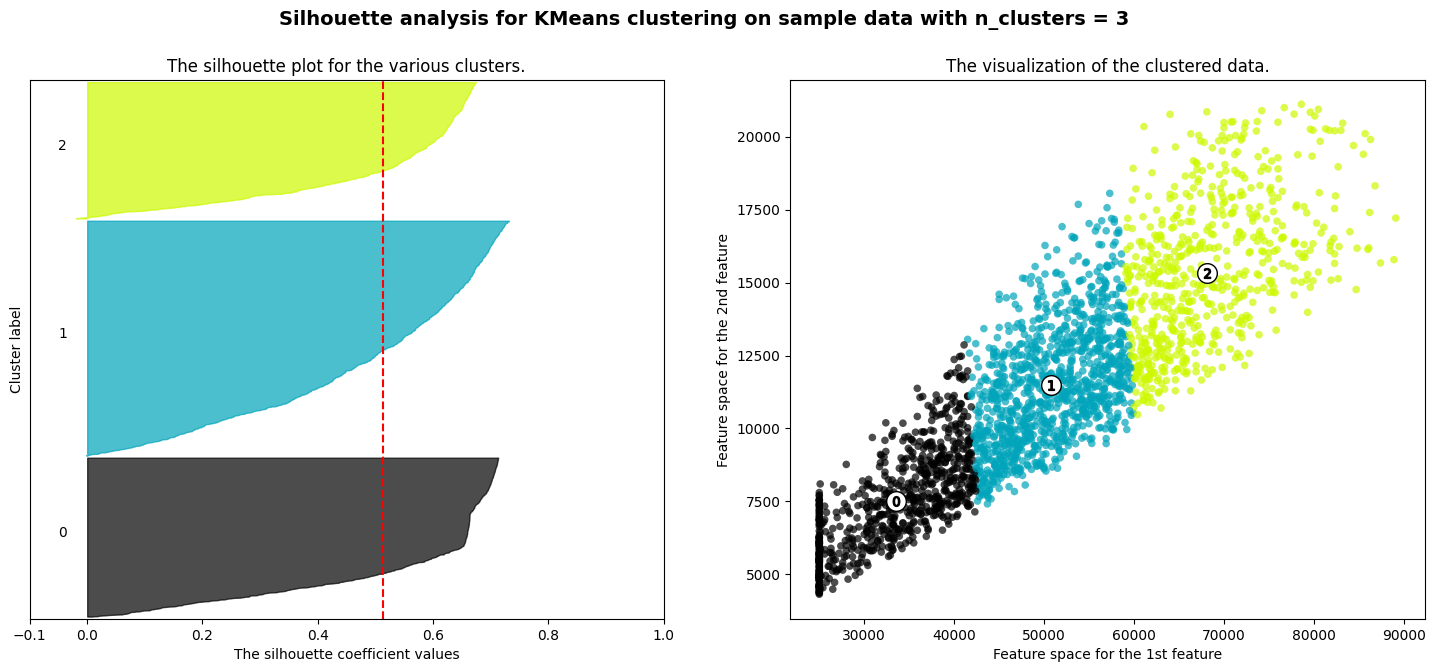

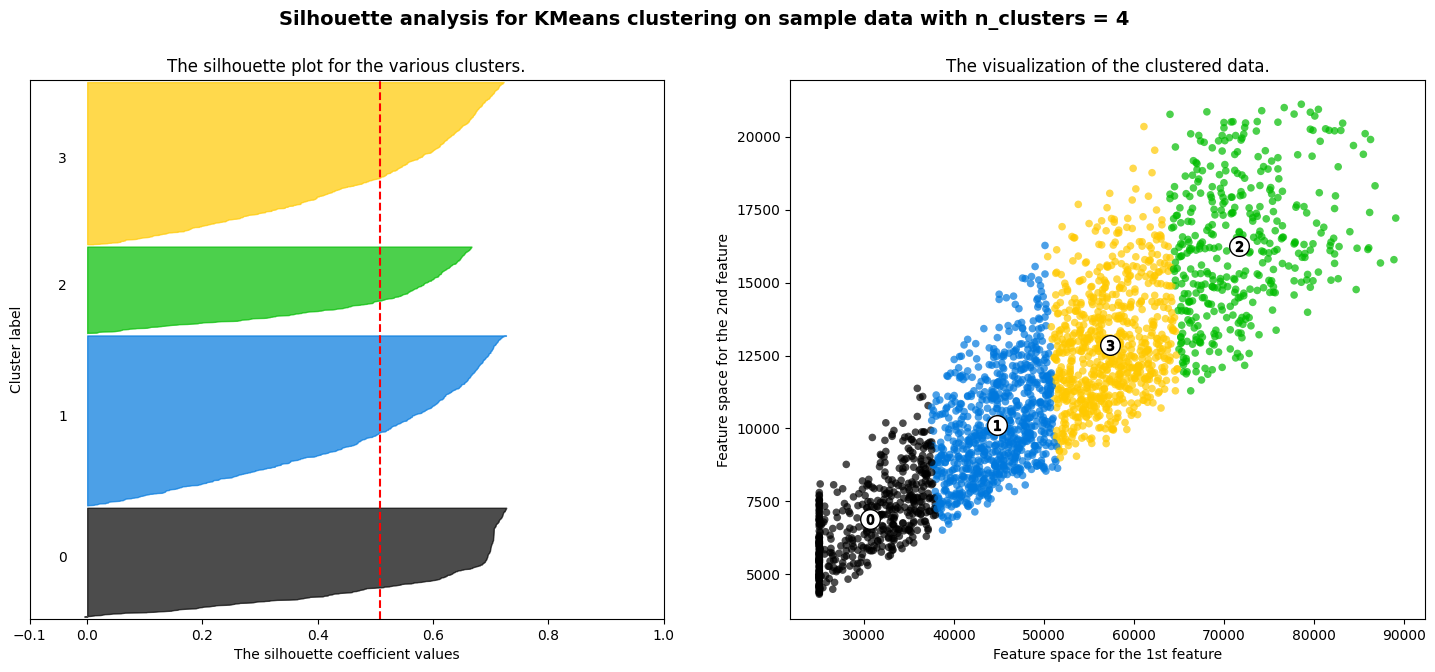

In [ ]:
# Definição do número máximo de clusters a ser testado
n_clusters = 5
inertia = []
silhouettes = []
clusters = range(2, n_clusters)
X = base.copy()

for k in clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Configuração inicial do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    # Aplicação do K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)

    labels = kmeans.predict(X)
    silh = silhouette_score(X, labels)  # Cálculo da média da silhueta

    silhouettes.append(silh)
    inertia.append(kmeans.inertia_)

    # Cálculo do coeficiente de silhueta para cada ponto
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(k):
        # Seleciona os coeficientes de silhueta do cluster i e ordena
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silh, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Gráfico de dispersão dos clusters
    colors = cm.nipy_spectral(labels.astype(float) / k)

    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Centro dos clusters
    centers = kmeans.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % k,
        fontsize=14,
        fontweight="bold",
    )

plt.show()






> *O k=2 tem melhor coeficiente de silhouette, mas escolhemos k=3 com coeficiente de silhouette de 0.515 , pois a distribuição dos clusters parece estar mais bem equilibrada.*





# Visualização e análise de Clusters

In [ ]:
# Definir o número ideal de clusters escolhido após a análise de silhueta
k_best = 3  # Substituir pelo K ótimo identificado

# Aplicar K-Means novamente com o número ótimo de clusters
kmeans_final = KMeans(n_clusters=k_best, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_cleaned['Cluster'] = kmeans_final.fit_predict(base)  # Adiciona os rótulos ao DataFrame

# Exibir os primeiros registros com a nova coluna de clusters
print(df_cleaned.head())

            Starting_Salary  ROI_Education  Success_Index  Cluster
Student_ID                                                        
S00001              27200.0    5179.965721        10882.8        0
S00003              42400.0    9758.342923        16962.1        1
S00005              47600.0   11669.526845        19043.5        1
S00006              68400.0   12640.916651        27362.3        2
S00008              38000.0    9313.725490        15201.3        0


In [ ]:
# Contar o número de elementos em cada cluster
cluster_counts = df_cleaned['Cluster'].value_counts().sort_index()

# Exibir os resultados
print("Distribuição dos Clusters:")
print(cluster_counts)

Distribuição dos Clusters:
Cluster
0     739
1    1079
2     619
Name: count, dtype: int64


In [ ]:
# Selecionar as variáveis para análise
selected_metrics = df_cleaned.columns.difference(['Cluster'])  # Exclui a coluna de clusters para pegar as variáveis numéricas

# Criar tabela resumo com médias das variáveis por cluster e contagem de elementos
cluster_summary = df_cleaned.groupby("Cluster")[selected_metrics].agg(['mean'])

# Renomear colunas para facilitar leitura
cluster_summary.columns = [f"{col}_{stat}" for col, stat in cluster_summary.columns]

# Formatando valores com 0 casas decimais
cluster_summary = cluster_summary.round(0).astype(int)

# Transpor a tabela para que clusters fiquem nas linhas
cluster_summary_transposed = cluster_summary.T

# Exibir os resultados formatados
cluster_summary


,ROI_Education_mean,Starting_Salary_mean,Success_Index_mean
Cluster,,,
0,7562,33635,13456
1,11516,50953,20383
2,15371,68240,27298


# Descrição dos clusters formados



>***Com base nas três variáveis analisadas (ROI da Educação, Salário Inicial e Índice de Sucesso), podemos descrever claramente três perfis distintos:***






> *📌Cluster 0 (Baixo desempenho geral)
ROI da Educação: Baixo (média: 7.562)
Salário Inicial: Baixo (média: 33.635)
Índice de Sucesso: Baixo (média: 13.456)
Interpretação:
Representa um grupo com desempenho mais limitado. Investimento em educação e retorno salarial são relativamente baixos, resultando num índice de sucesso reduzido.*

> *📌 Cluster 1 (Desempenho intermediário)
ROI da Educação: Médio (média: 11.516)
Salário Inicial: Médio (média: 50.953)
Índice de Sucesso: Médio (média: 20.383)
Interpretação:
Grupo intermediário, com retorno educacional moderado, resultando em salários medianos e índice de sucesso equilibrado.*


> *📌 Cluster 2 (Alto desempenho geral)
ROI da Educação: Alto (média: 15.371)
Salário Inicial: Alto (média: 68.240)
Índice de Sucesso: Alto (média: 27.298)
Interpretação:
Claramente um grupo de alta performance, que investe significativamente na educação, obtendo retorno elevado em termos de salário inicial e índice geral de sucesso.*


> ***Conclusão dos clusters***

> *Os clusters formados indicam claramente três níveis distintos de desempenho relacionados ao investimento em educação e retorno financeiro. O grupo mais alto (Cluster 2) apresenta forte correlação entre investimento educacional e sucesso financeiro inicial, enquanto o Cluster 0 mostra que menor investimento educacional está diretamente relacionado ao menor retorno salarial e índice de sucesso.*
